# Script to plot test data for DensityGridder with velocity divergence data

In [49]:
import glob
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid')

In [77]:
N = np.fromfile('grid_N.dat',dtype=np.int32)
divv = np.fromfile('grid_div.dat',dtype=np.float64)

In [78]:
#divv=divv.reshape(len(divv)//3,3)
divv=divv.reshape(3,len(divv)//3)  # Not clear if this is the right way around, but it does co-locate the NANs

In [79]:
print(len(N))
print(divv.shape)

125000
(3, 125000)


In [80]:
L=int(len(N)**(1/3)+0.5)
N=N.reshape(L,L,L)
divv=divv.reshape(3,L,L,L)
divv_sum=np.sum(divv,0)

Input velocities were a sinusoidal wave, so output divergence should be too.  So I think that means that I should plot just one line of cells against N.

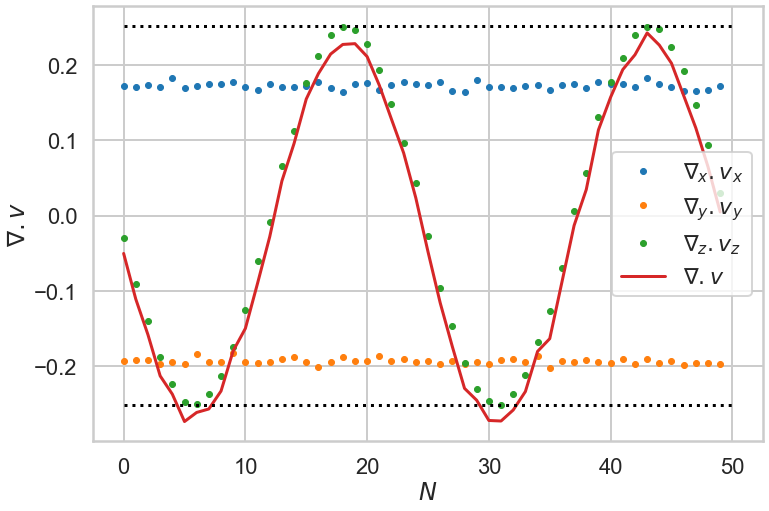

In [91]:
yoff=3
zoff=15
fig=plt.figure(figsize=[12,8])
plt.plot(divv[0,:,yoff,zoff],'.',label=r'$\nabla_x.v_x$')
plt.plot(divv[1,:,yoff,zoff],'.',label=r'$\nabla_y.v_y$')
plt.plot(divv[2,:,yoff,zoff],'.',label=r'$\nabla_z.v_z$')
plt.plot(divv_sum[:,yoff,zoff],label=r'$\nabla.v$')
plt.plot([0,L],[4*np.pi/L,4*np.pi/L],':k')
plt.plot([0,L],[-4*np.pi/L,-4*np.pi/L],':k')
plt.xlabel(r'$N$')
plt.ylabel(r'$\nabla.v$')
plt.legend()